# Matemáticas para Data Science: Estadística descriptiva


In [1]:
#Exploración de datos.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [16]:
df = pd.read_csv('cars.csv')

In [7]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


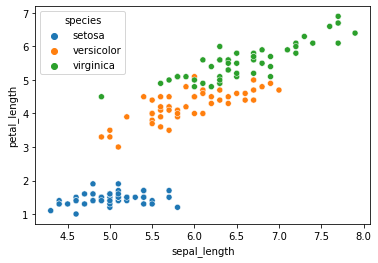

In [11]:
#Scatterplot

sns.scatterplot(data=iris, x='sepal_length',y='petal_length', hue='species');

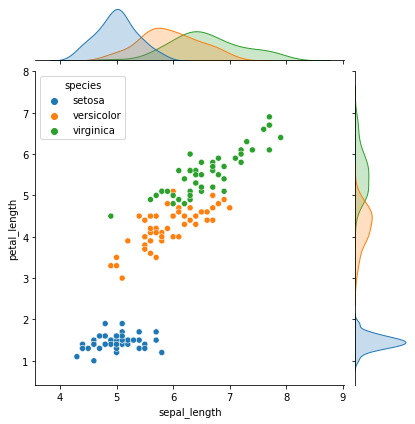

In [13]:
#join-plot
sns.jointplot(data=iris, x='sepal_length',y='petal_length', hue='species');

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

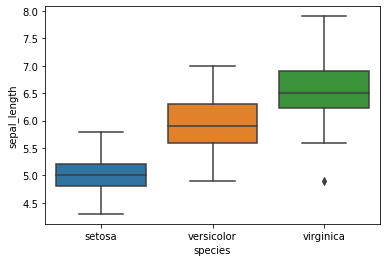

In [14]:
#box plot

sns.boxplot(data=iris, x='species', y='sepal_length')

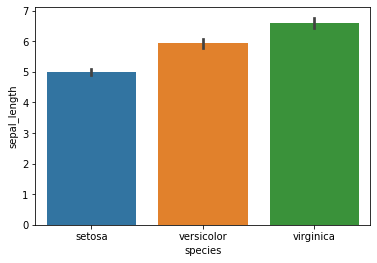

In [16]:
sns.barplot(data=iris, x='species', y='sepal_length');

# Escalamiento de datos numéricos

Transformaciones lineales

In [2]:
import timeit

In [3]:
from sklearn import datasets, linear_model #Regresiones lineales

In [4]:
X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:,None,2]

$\frac{}{}$

In [6]:
# Reglas de escalamiento

#Regla del máximo mínimo

max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw)

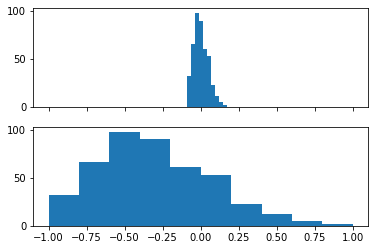

In [10]:
fig, axs = plt.subplots(2,1,sharex=True ) 
axs[0].hist(raw)
axs[1].hist(scaled)
plt.show()

In [11]:
# Modelos para entrenamiento

def train_raw():
    linear_model.LinearRegression().fit(raw,y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled,y)
    

In [14]:
raw_time = timeit.timeit(train_raw, number=100)
scaled_time = timeit.timeit(train_scaled, number=100)

print(f'train raw: {raw_time} \nscaled time {scaled_time}')

train raw: 0.06135599299977912 
scaled time_ 0.0447992150002392


- Max-Min scalling: mejor para datos uniformemente distribuidos.
- z-score scalling: mejor para datos distribuidos "normalmente" (forma de campana de Gauss)

# Transformaciones no lineales

In [17]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


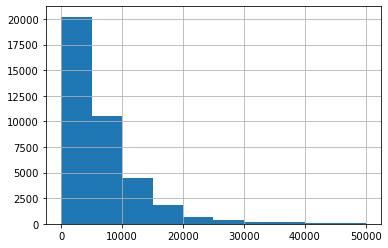

In [18]:
df.price_usd.hist();

## Transformación hiperbólica tanh(x)

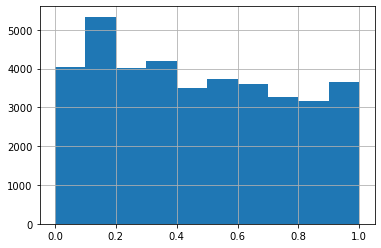

In [20]:
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist();

# Variables categóricas

¿existen casos donde se pueda tratar variables numéricas como categóricas?
La respuesta es sí y que depende del tipo de uso.


In [23]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [24]:
#Función de pandas llamada get_dummies

#one-hot pero le llaman dummies
pd.get_dummies(df['engine_type'])

,diesel,electric,gasoline
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
38526,0,0,1
38527,1,0,0
38528,0,0,1
38529,0,0,1


In [27]:
#one-hot en sckiky learn

import sklearn.preprocessing as preprocessing

encoder = preprocessing.OneHotEncoder(handle_unknown ='ignore')

In [28]:
encoder.fit(df[['engine_type']].values)

OneHotEncoder(handle_unknown='ignore')

In [29]:
encoder.transform([['gasoline'],['diesel'],['aceite']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [30]:
#Trabajar numéricas como categóricas

encoder.fit(df[['year_produced']].values)

OneHotEncoder(handle_unknown='ignore')

In [32]:
encoder.transform([[2016],[2009],[199]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

# Matriz de covarianza


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
iris = sns.load_dataset('iris')

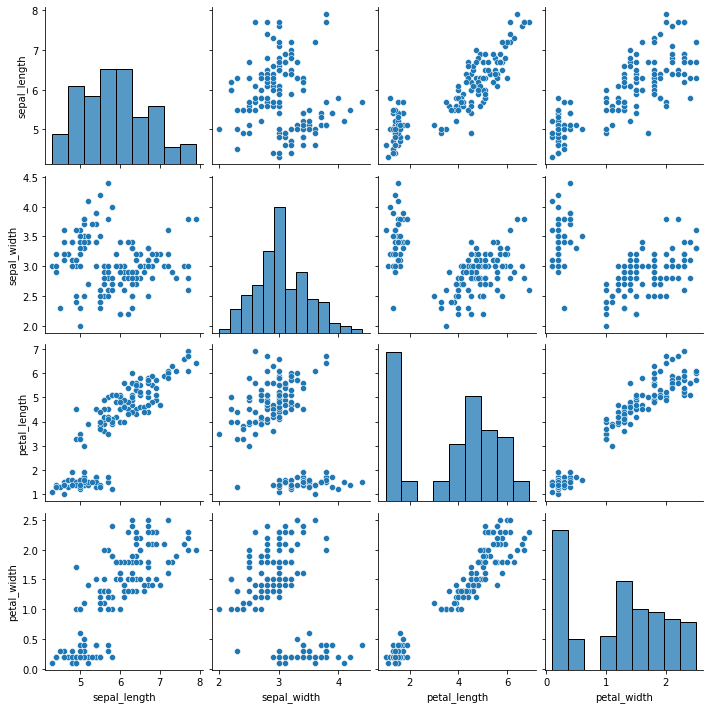

In [36]:
sns.pairplot(iris)

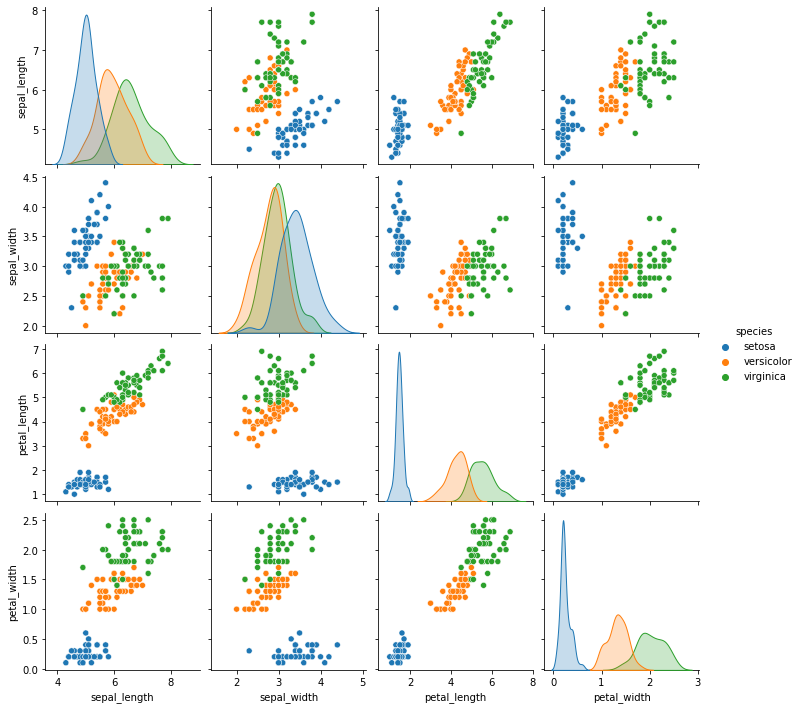

In [37]:
sns.pairplot(iris, hue='species')

In [39]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [40]:
scaler = StandardScaler()
scaled = scaler.fit_transform(
        iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)
scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [41]:
scaled.T

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

In [42]:
covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

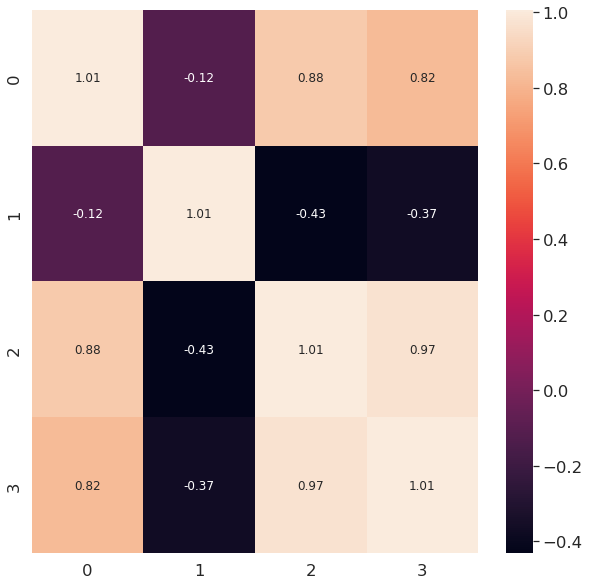

In [45]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(covariance_matrix,
                cbar=True,
                annot=True,
                fmt='.2f',
                annot_kws = {'size':12}
                )

<AxesSubplot:>

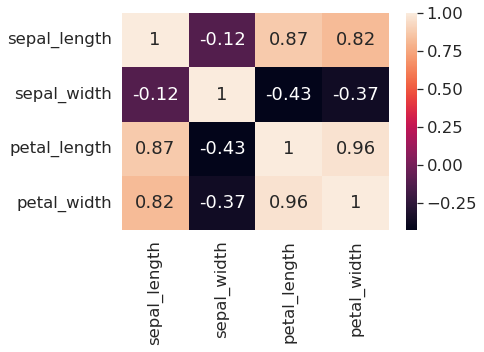

In [46]:
# una forma más rápida de hacerlo

sns.heatmap(iris.corr(),annot=True)

In [54]:
# con pandas:
#Normalizamos
scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)


In [58]:
#Pasamos al dataframe
scaled_df=pd.DataFrame(scaled)

In [59]:
scaled_df.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [56]:
#Matriz de covarianza y matriz de correlación
covar=scaled_df.cov()
correlacion_matrix_pd=scaled_df.corr()

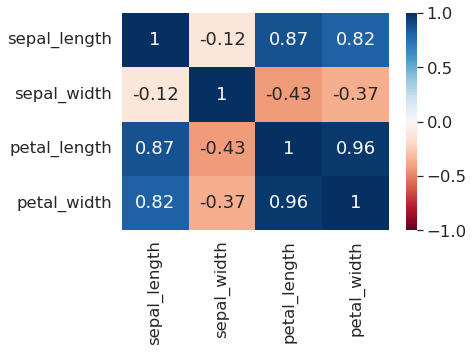

In [57]:
hm=sns.heatmap(correlacion_matrix_pd,
                annot=True,
                cmap="RdBu",
                vmin=-1.0,
                yticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                xticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
                )

# Reducción de dimensionalidad con PCA


In [62]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [64]:
scaler = StandardScaler()
scaled = scaler.fit_transform(
        iris[['sepal_length', 'sepal_width','petal_length','petal_width']].values
)

covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

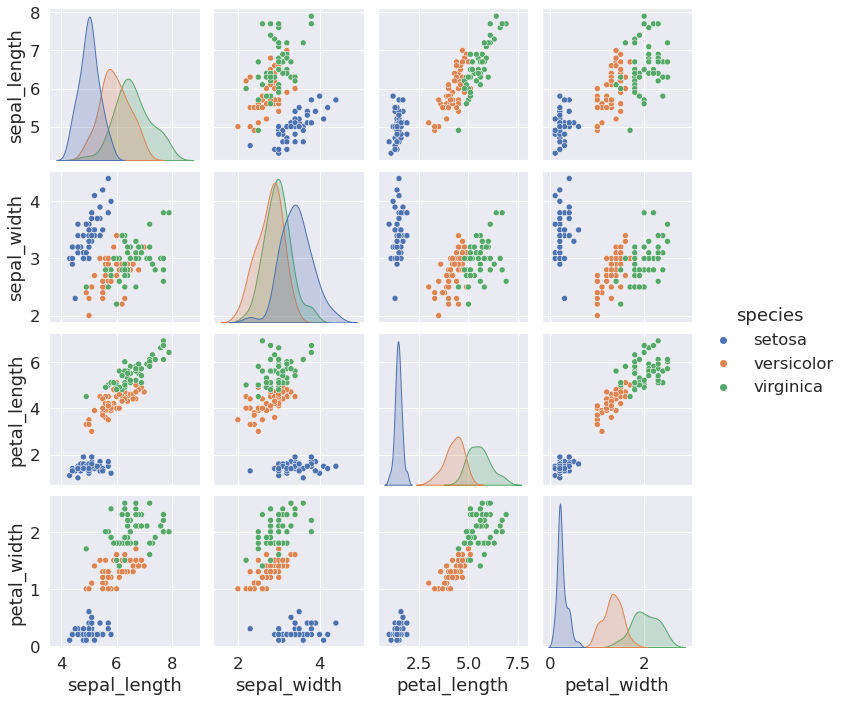

In [67]:
sns.pairplot(iris, hue='species')

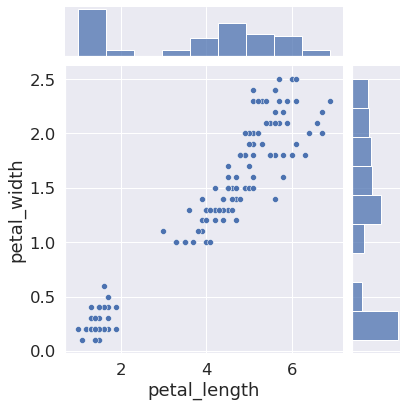

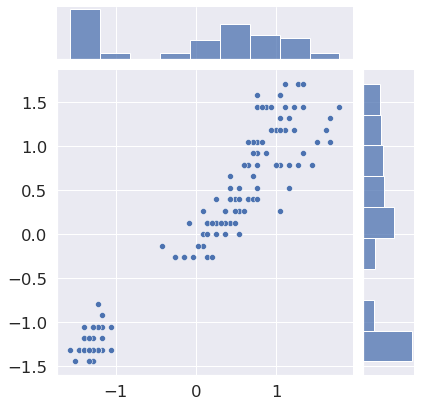

In [70]:
sns.jointplot(x=iris['petal_length'],y=iris['petal_width'])
sns.jointplot(x=scaled[:,2], y=scaled[:,3])

In [71]:
# metodos de Algebra lineal de Numpy

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [72]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [73]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [74]:
variance_explained = []

for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[72.96244541329987, 22.850761786701757, 3.6689218892828763, 0.5178709107154831]


In [75]:
# Para la reducción de dimensionalidad se utiliza sklearn 
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(scaled)


PCA(n_components=2)

In [76]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [77]:
reduced_scaled = pca.transform(scaled)

In [78]:
reduced_scaled #Logramos convertir 4 dim a 2!

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [79]:
iris['pca_1'] = reduced_scaled[:,0]
iris['pca_2'] = reduced_scaled[:,1]
iris

,sepal_length,sepal_width,petal_length,petal_width,species,pca_1,pca_2
0,5.1,3.5,1.4,0.2,setosa,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,setosa,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,setosa,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,setosa,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,setosa,-2.389842,0.646835
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.870503,0.386966
146,6.3,2.5,5.0,1.9,virginica,1.564580,-0.896687
147,6.5,3.0,5.2,2.0,virginica,1.521170,0.269069
148,6.2,3.4,5.4,2.3,virginica,1.372788,1.011254


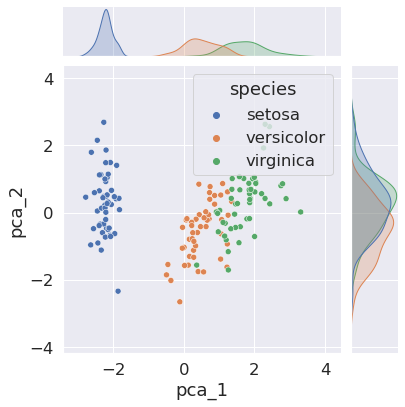

In [83]:
# Evidenciar

sns.jointplot(x=iris['pca_1'],y=iris['pca_2'], hue=iris['species']);